# Read and Write Mesh Data

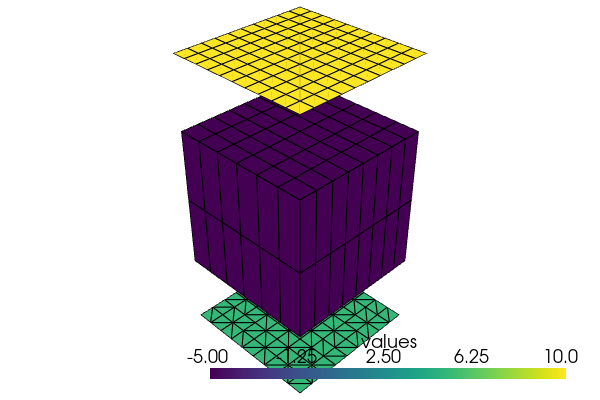

In [16]:
from polymesh import PolyData
from polymesh.tri.trimesh import TriMesh
from polymesh.grid import Grid
from polymesh.space import StandardFrame
import numpy as np

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape='Q4', frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape='H8', frame=A)

mesh = PolyData(frame=A)
mesh['tri', 'T3'] = tri.move(np.array([0., 0., -50]))
mesh['grids', 'Q4'] = grid2d.move(np.array([0., 0., 150]))
mesh['grids', 'H8'] = grid3d

mesh['tri', 'T3'].pointdata['values'] = np.full(tri.coords().shape[0], 5.)
mesh['grids', 'Q4'].pointdata['values'] = np.full(
    grid2d.coords().shape[0], 10.)
mesh['grids', 'H8'].pointdata['values'] = np.full(
    grid3d.coords().shape[0], -5.)

mesh.pvplot(notebook=True, window_size = (600, 400), 
            jupyter_backend='static', scalars='values')

In [17]:
mesh['tri', 'T3'].pd.to_parquet("pdT3.parquet")
mesh['grids', 'Q4'].pd.to_parquet("pdQ4.parquet")
mesh['grids', 'H8'].pd.to_parquet("pdH8.parquet")
mesh['tri', 'T3'].cd.to_parquet("cdT3.parquet")
mesh['grids', 'Q4'].cd.to_parquet("cdQ4.parquet")
mesh['grids', 'H8'].cd.to_parquet("cdH8.parquet")
paths = ["pdT3.parquet", "pdQ4.parquet", "pdH8.parquet", 
         "cdT3.parquet", "cdQ4.parquet", "cdH8.parquet"]

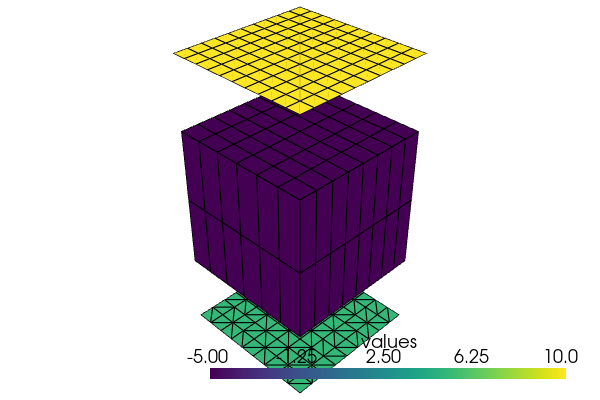

In [18]:
from polymesh.cells import T3, Q4, H8
from polymesh import PointData

frame=StandardFrame(dim=3)
mesh = PolyData(frame=frame)

pdT3 = PointData.from_parquet("pdT3.parquet")
cdT3 = T3.from_parquet("cdT3.parquet")
mesh['tri', 'T3'] = PolyData(pdT3, cdT3, frame=frame)

pdQ4 = PointData.from_parquet("pdQ4.parquet")
cdQ4 = Q4.from_parquet("cdQ4.parquet")
mesh['grids', 'Q4'] = PolyData(pdQ4, cdQ4, frame=frame)

pdH8 = PointData.from_parquet("pdH8.parquet")
cdH8 = H8.from_parquet("cdH8.parquet")
mesh['grids', 'H8'] = PolyData(pdH8, cdH8, frame=frame)

mesh.pvplot(notebook=True, window_size = (600, 400), 
            jupyter_backend='static', scalars='values')

In [19]:
mesh.to_parquet("mesh_pd.parquet", "mesh_cd.parquet")
paths.extend(["mesh_pd.parquet", "mesh_cd.parquet"])

In [24]:
df_pd, df_cd = mesh.to_pandas()

In [23]:
import os
for path in paths:
    if os.path.exists(path):
        os.remove(path)